In [30]:
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import *
from sklearn.metrics import *

In [93]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [32]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [33]:
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [34]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [89]:
print(f"Duplicados: {df.duplicated().sum()}")

Duplicados: 0


In [36]:
#Remoção de registos duplicados se necessário

#df.drop_duplicates()

In [37]:
df.isna().any()
print(df.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<AxesSubplot:>

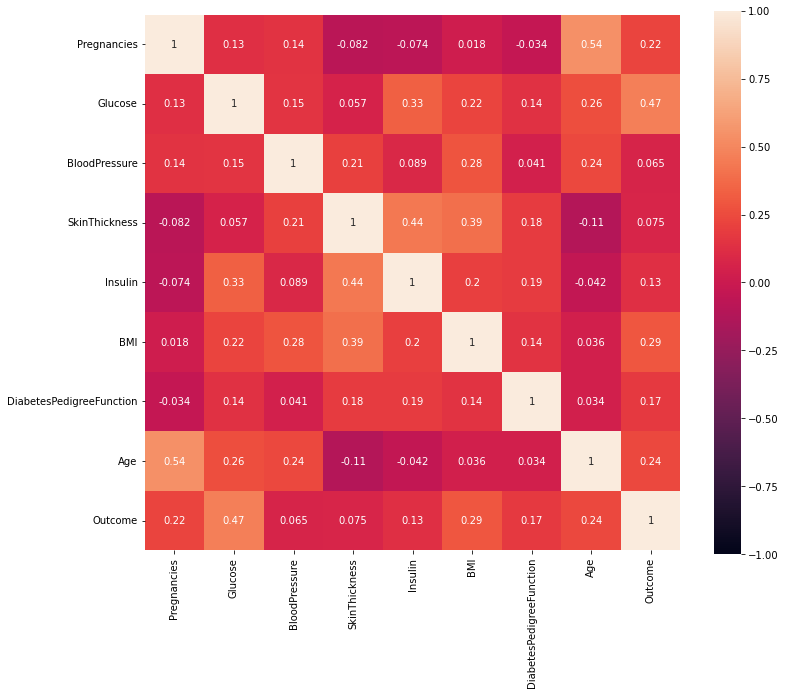

In [38]:
#matriz de correlação

corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

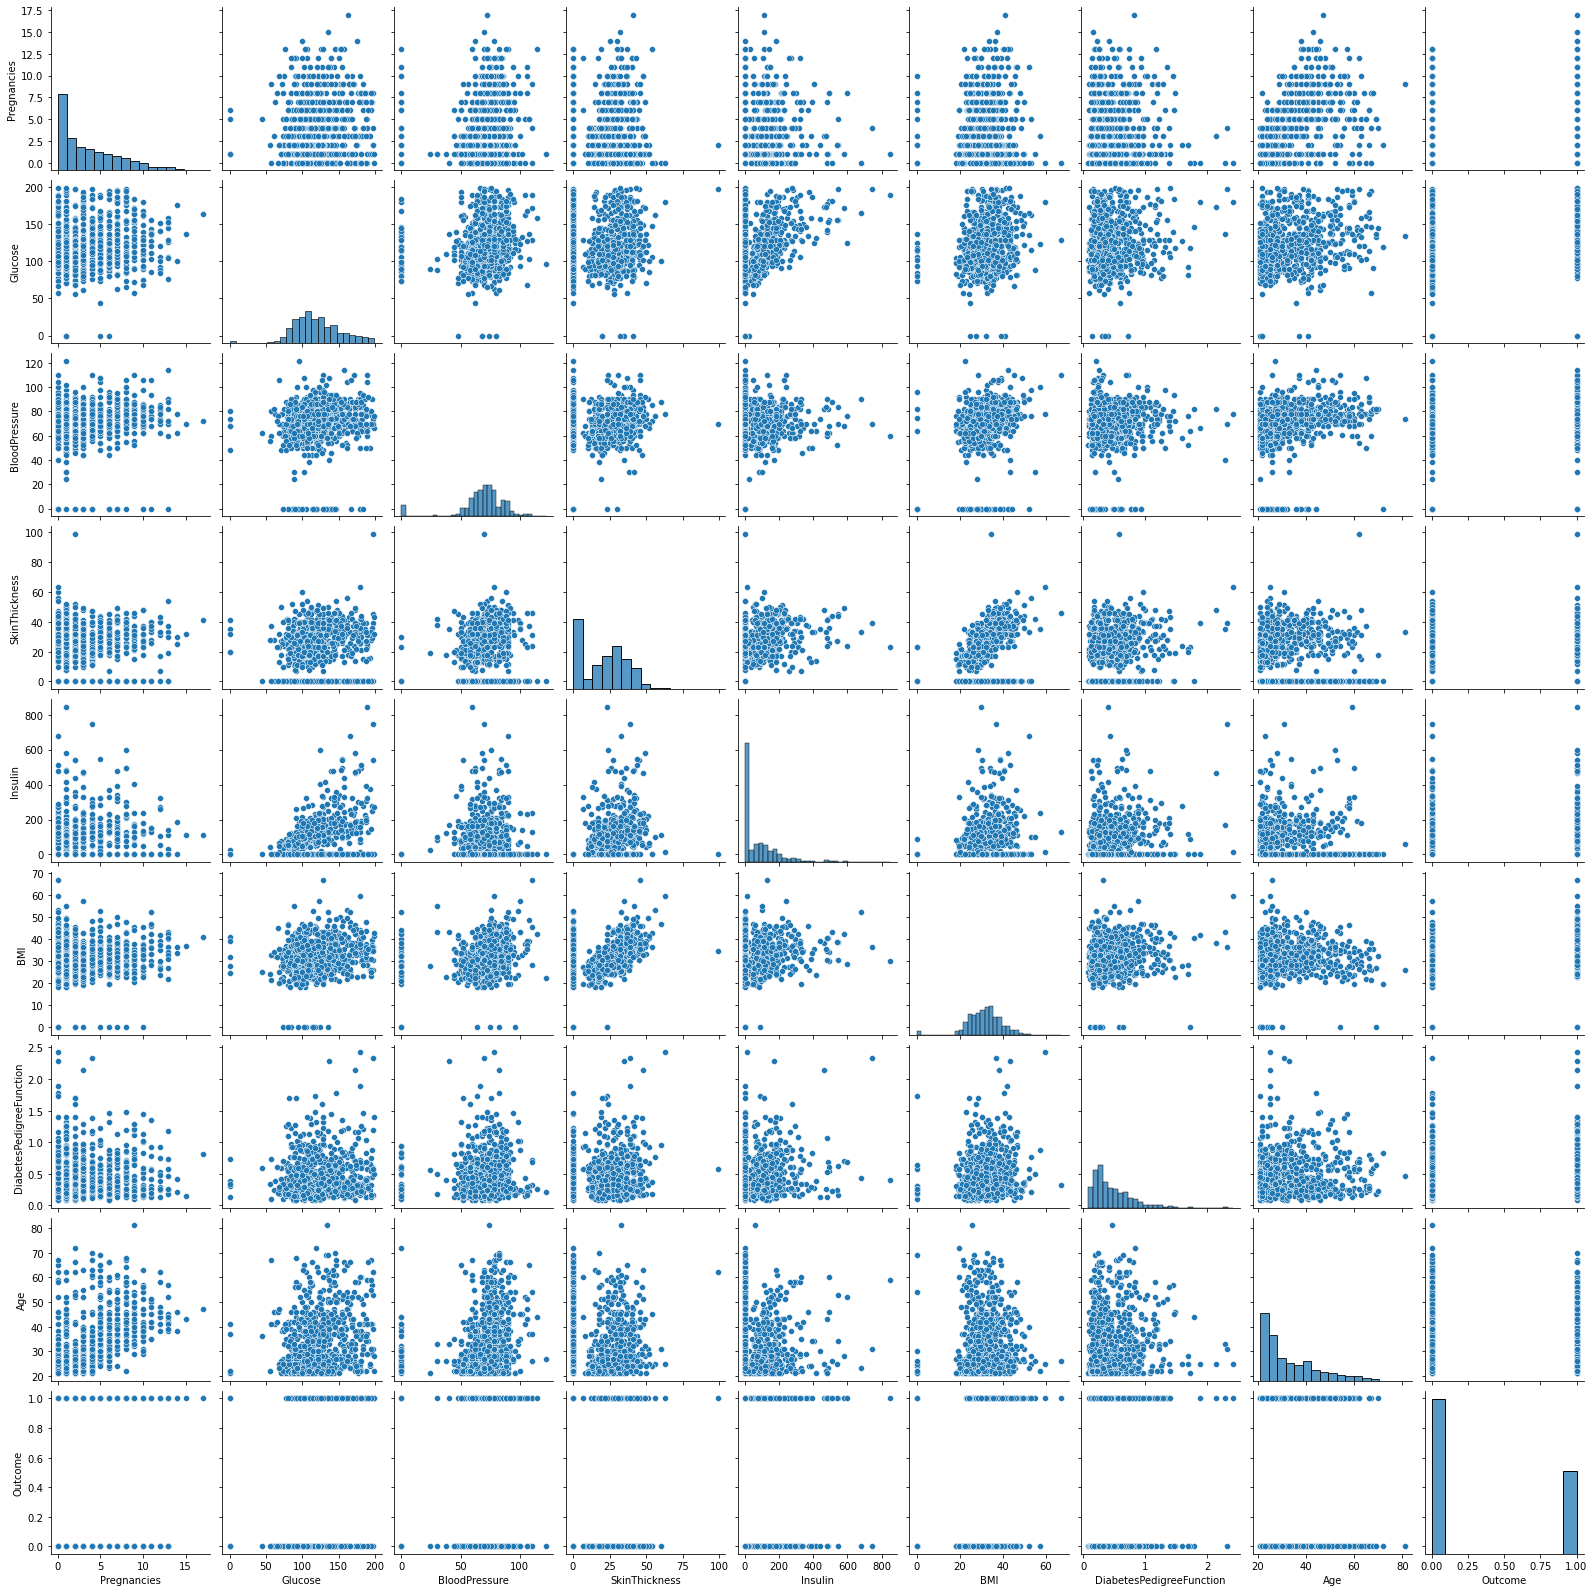

In [39]:
#sns.pairplot(df)

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

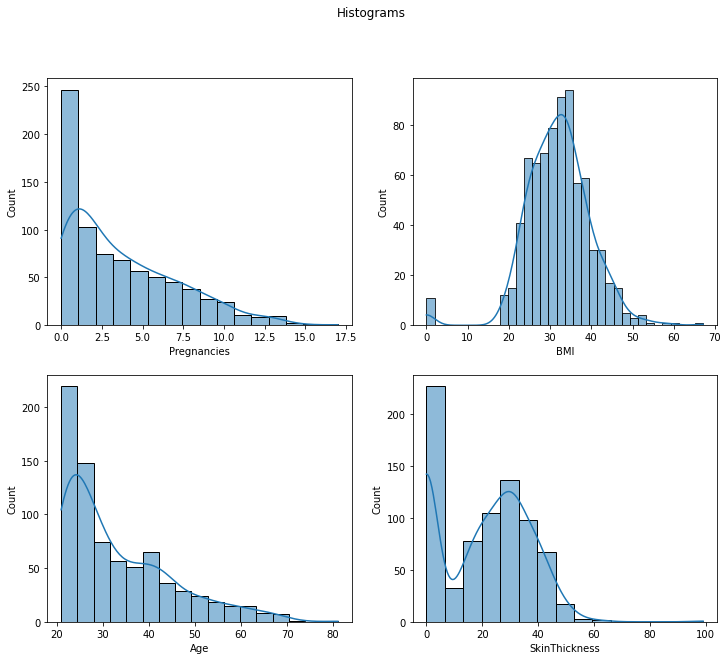

In [90]:
# Check if column follows gaussian dispersion

fig,axs = plt.subplots(2,2,figsize=(12,10))
fig.suptitle('Histograms')

sns.histplot(df['Pregnancies'],ax=axs[0,0],kde=True)
sns.histplot(df['BMI'],ax=axs[0,1],kde=True)
sns.histplot(df['Age'],ax=axs[1,0],kde=True)
sns.histplot(df['SkinThickness'],ax=axs[1,1],kde=True)

Conclusão: Glucose e BMI seguem uma distribuição gaussiana, Age possui muitos valores perto do mínimo (média desviada para a esquerda) e skinthickness possui outliers

# Tratamento de dados

### Tratamento de valores nulos

Substituição pela mediana

In [94]:
print("Number of 0 values of Glucose: " + str(len(df.loc[(df['Glucose'] == 0 )].index)))
print("Number of 0 values of BloodPressure: " + str(len(df.loc[(df['BloodPressure'] == 0 )].index)))
print("Number of 0 values of SkinThickness: " + str(len(df.loc[(df['SkinThickness'] == 0 )].index)))
print("Number of 0 values of BMI: " + str(len(df.loc[(df['BMI'] == 0 )].index)))
print("Number of 0 values of Insulin: " + str(len(df.loc[(df['Insulin'] == 0 )].index)))

median_glucose = df['Glucose'].median()
median_blood_pressure = df['BloodPressure'].median()
median_skin_thickness = df['SkinThickness'].median()
median_bmi = df['BMI'].median()
median_insulin = df['Insulin'].median()

print("Median before: -----------------------------------------")
print(f"Median Glucose: {median_glucose}")
print(f"Median BloodPressure: {median_blood_pressure}")
print(f"Median SkinThickness: {median_skin_thickness}")
print(f"Median BMI: {median_bmi}")
print(f"Median Insulin: {median_insulin}")


df['Glucose'].replace(0,median_glucose,inplace=True)
df['BloodPressure'].replace(0,median_blood_pressure,inplace=True)
#df['SkinThickness'].replace(0,median_skin_thickness,inplace=True)
df = df.drop(df.loc[(df['SkinThickness'] == 0 )].index)
df['BMI'].replace(0,median_bmi,inplace=True)
df['Insulin'].replace(0,median_bmi,inplace=True)

median_glucose = df['Glucose'].median()
median_blood_pressure = df['BloodPressure'].median()
median_skin_thickness = df['SkinThickness'].median()
median_bmi = df['BMI'].median()
median_insulin = df['Insulin'].median()

print("Median after: -----------------------------------------")
print(f"Median Glucose: {median_glucose}")
print(f"Median BloodPressure: {median_blood_pressure}")
print(f"Median SkinThickness: {median_skin_thickness}")
print(f"Median BMI: {median_bmi}")
print(f"Median Insulin: {median_insulin}")

df

Number of 0 values of Glucose: 5
Number of 0 values of BloodPressure: 35
Number of 0 values of SkinThickness: 227
Number of 0 values of BMI: 11
Number of 0 values of Insulin: 374
Median before: -----------------------------------------
Median Glucose: 117.0
Median BloodPressure: 72.0
Median SkinThickness: 23.0
Median BMI: 32.0
Median Insulin: 30.5
Median after: -----------------------------------------
Median Glucose: 116.0
Median BloodPressure: 72.0
Median SkinThickness: 29.0
Median BMI: 32.8
Median Insulin: 90.0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,32,33.6,0.627,50,1
1,1,85,66,29,32,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,32,44.0,0.403,43,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,32,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


### Tratamento de outliers (remover todos acima de 60)

In [95]:
df = df.drop(df.loc[(df['SkinThickness'] > 60 )].index)
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,32,33.6,0.627,50,1
1,1,85,66,29,32,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,32,44.0,0.403,43,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,32,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


## Balanceamento

In [96]:
# Analisar o balanceamento dos dados
df.groupby(by=['Outcome']).count()


# Concluir que existem muitos mais casos '0' (500) do que casos '1' (268) -> Dataset desbalanceado

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,361,361,361,361,361,361,361,361
1,178,178,178,178,178,178,178,178


### Concluir que existem muitos mais casos '0' (500) do que casos '1' (268) -> Dataset desbalanceado

In [97]:
from collections import Counter
from imblearn import *
from imblearn.combine import *
from imblearn.over_sampling import *

x = df.drop(['Outcome'],axis=1)
y = df['Outcome'].to_frame().values.ravel()
counter = Counter(y)
print(f" Tamanho do dataset antes do balanceamento: {counter}")
oversample = SMOTE(sampling_strategy=0.8)
x, y = oversample.fit_resample(x, y)
counter = Counter(y)
print(f" Tamanho do dataset após balanceamento: {counter}")

 Tamanho do dataset antes do balanceamento: Counter({0: 361, 1: 178})
 Tamanho do dataset após balanceamento: Counter({0: 361, 1: 288})


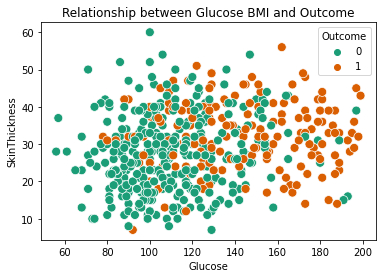

In [98]:
# Scatter plot

sns.scatterplot(x='Glucose',y='SkinThickness',hue='Outcome',data=df,palette='Dark2',s=80)
plt.title("Relationship between Glucose BMI and Outcome")
plt.show()

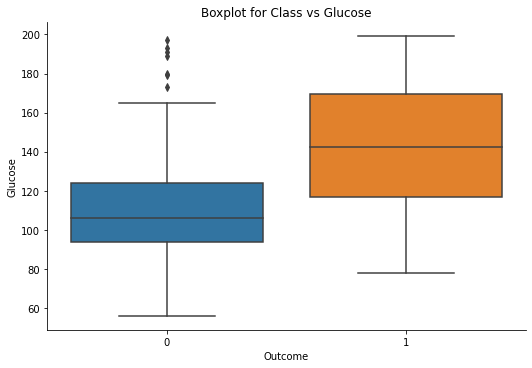

In [83]:
# Check the relationship between a numeric variable and a categorical variable

sns.catplot(x='Outcome',y='Glucose',data=df,kind='box',aspect=1.5)
plt.title("Boxplot for Class vs Glucose")
plt.show()

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

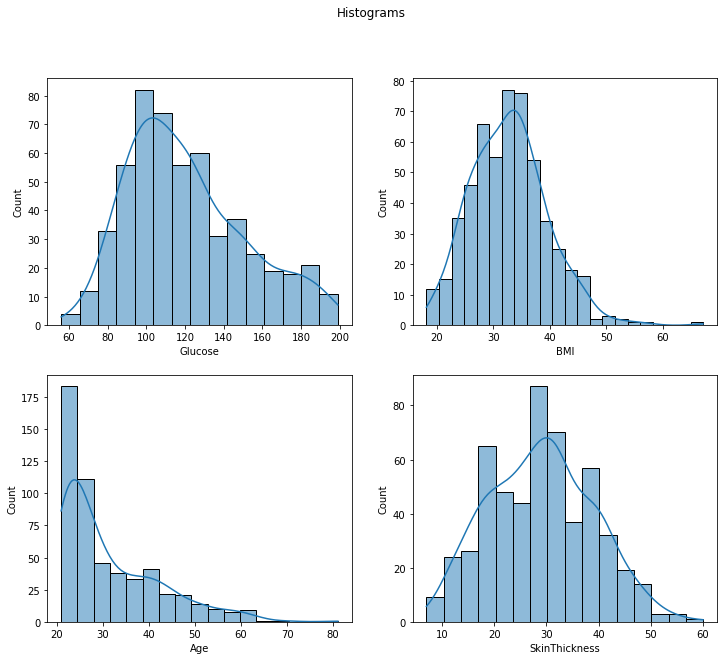

In [100]:
# Check if column follows gaussian dispersion

fig,axs = plt.subplots(2,2,figsize=(12,10))
fig.suptitle('Histograms')

sns.histplot(df['Glucose'],ax=axs[0,0],kde=True)
sns.histplot(df['BMI'],ax=axs[0,1],kde=True)
sns.histplot(df['Age'],ax=axs[1,0],kde=True)
sns.histplot(df['SkinThickness'],ax=axs[1,1],kde=True)

 Tamanho do dataset após balanceamento: Counter({0: 361, 1: 288})


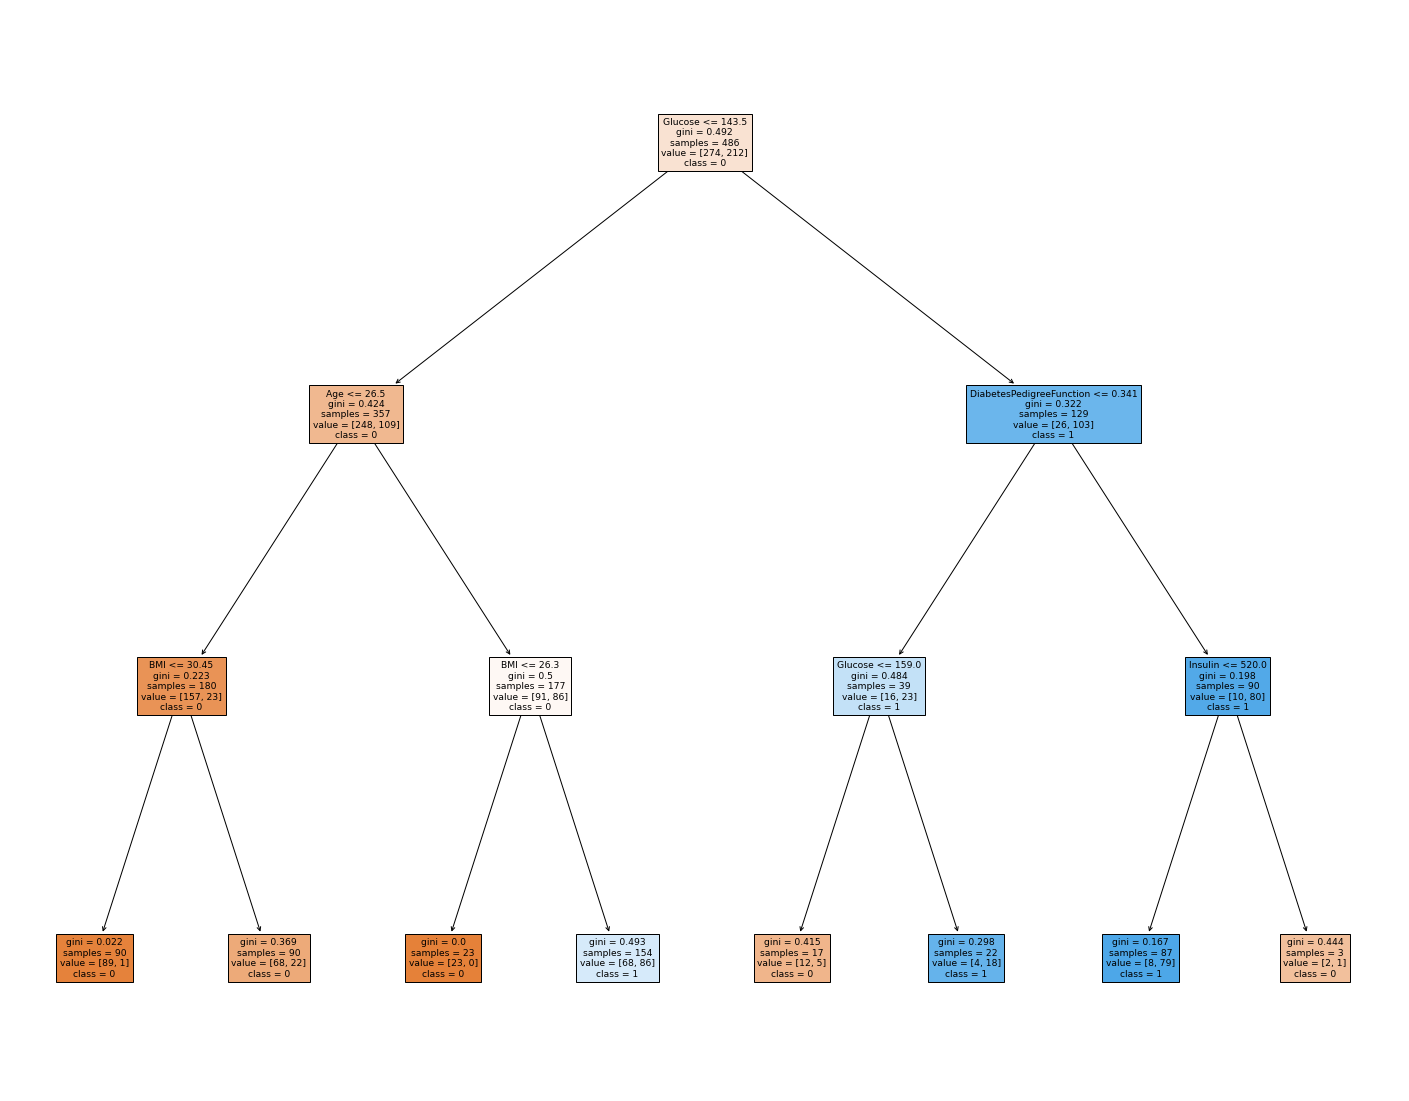

Overall acuraccy using a decision tree: 0.7300613496932515


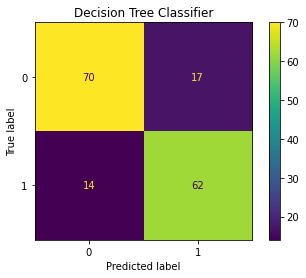

Overall acuraccy using a gradient Boosting classifier: 0.809816


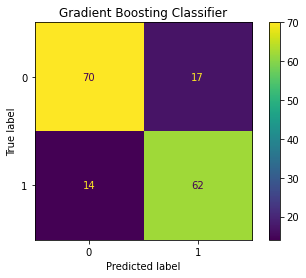

[0.66153846 0.66153846 0.76923077 0.75384615 0.75384615 0.76923077
 0.81538462 0.81538462 0.8        0.75      ]
RESULT: 0.76 accuracy with a standard deviation of 0.05


In [99]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=2021)

counter = Counter(y)
print(f" Tamanho do dataset após balanceamento: {counter}")

decision_tree = DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=2021)

decision_tree.fit(x_train,y_train)

predictions_decision_tree = decision_tree.predict(x_test)

# --- Print da árvore simplificada com 3 níveis ---------------------------------------------------

decision_tree_print = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=2021)

decision_tree_print.fit(x_train,y_train)
fig = plt.figure(figsize=(25,20))
tree.plot_tree(decision_tree_print, 
                   feature_names=x.columns,  
                   class_names=['0','1'],
                   filled=True)
plt.show()

# -------------------------------------------------------------------------------------------------


print(f"Overall acuraccy using a decision tree: {accuracy_score(predictions_decision_tree,y_test)}") 


gradient_boosting_classifier = GradientBoostingClassifier()
gradient_boosting_classifier.fit(x_train, y_train)
predictions_gradient_boosting_classifier = gradient_boosting_classifier.predict(x_test)

decision_tree_confusion_matrix = confusion_matrix(y_test, predictions_gradient_boosting_classifier, labels=decision_tree.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=decision_tree_confusion_matrix,
                              display_labels=decision_tree.classes_)
disp.plot()
plt.title("Decision Tree Classifier")
plt.show()

print('Overall acuraccy using a gradient Boosting classifier: %0f' % gradient_boosting_classifier.score(x_test, y_test))


gradient_boosting_classifier_confusion_matrix = confusion_matrix(y_test, predictions_gradient_boosting_classifier, labels=decision_tree.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=decision_tree_confusion_matrix,
                              display_labels=decision_tree.classes_)
disp.plot()
plt.title("Gradient Boosting Classifier")
plt.show()


scores = cross_val_score(decision_tree, x, y, cv=10)
print(scores)

print("RESULT: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

